# Workflow


## Packages

`filpy` is my own package. See the [README](./README.md)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import filpy
from filpy import u
from filpy import cube_stuff as cb


## IRAM

### Load data

Data are in `MJy / sr` where `Jy = W / (m**2 Hz)`

In [2]:
from filpy import IR_PATHS

IR60_HDUL, IR60_DATA   = filpy.get_data_fit(IR_PATHS[0],display_plots=False)
IR100_HDUL, IR100_DATA = filpy.get_data_fit(IR_PATHS[1],display_plots=False) 


Filename: /home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/MBM40/IR/IRAS-60_RA+DEC_242.64+21.822.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   (1000, 1000)   float32   
 - HEADER -
SIMPLE  =                    T / Written by SkyView Thu Oct 17 10:19:07 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                 1000 / Width of image                                 
NAXIS2  =                 1000 / Height of image                                
CRVAL1  =   242.64199999999994 / Reference longitude                            
CRVAL2  =               21.822 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYP

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


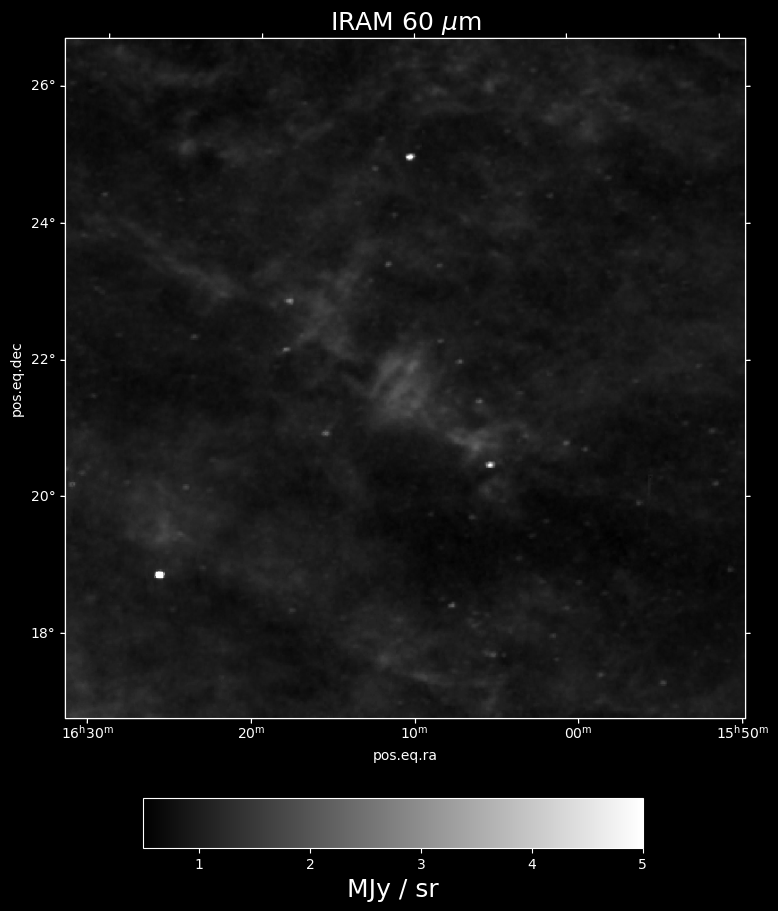

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


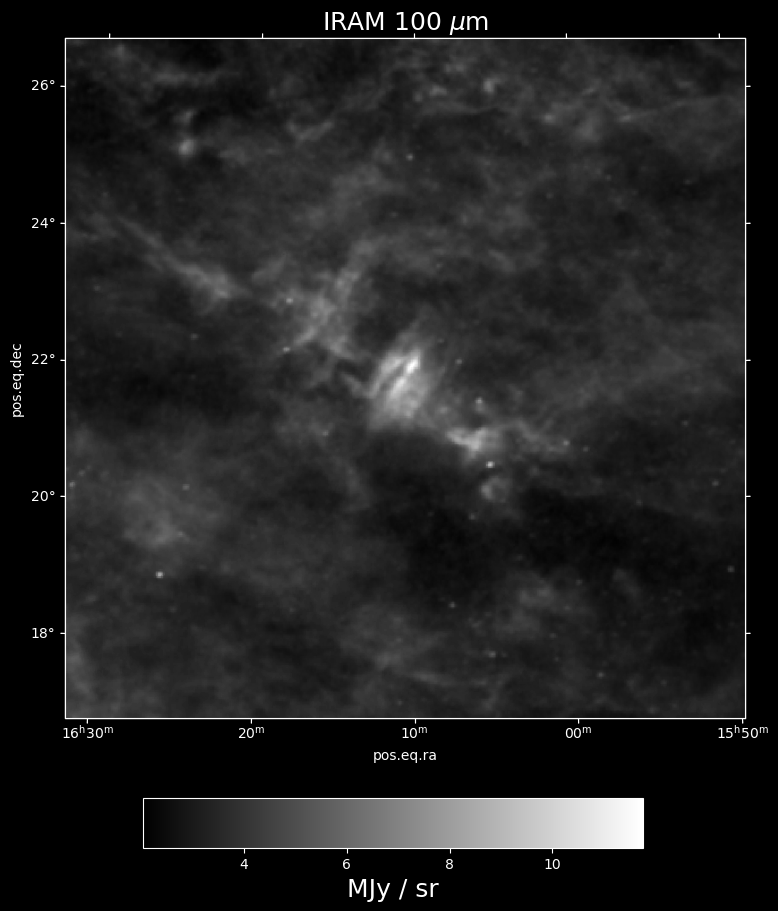

In [3]:
INT_UNIT = 'MJy / sr'

ir60_wcs = cb.WCS(IR60_HDUL[0].header)
filpy.show_image(IR60_DATA,projection=ir60_wcs,title='IRAM 60 $\\mu$m',show=True,vmax=5,barlabel=INT_UNIT)

ir100_wcs = cb.WCS(IR100_HDUL[0].header)
filpy.show_image(IR100_DATA,projection=ir100_wcs,title='IRAM 100 $\\mu$m',show=True,barlabel=INT_UNIT)



### Sobel filter

After smoothing the image by a Gaussian filter, apply the Sobel filter to the image in order to magnify the edges

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


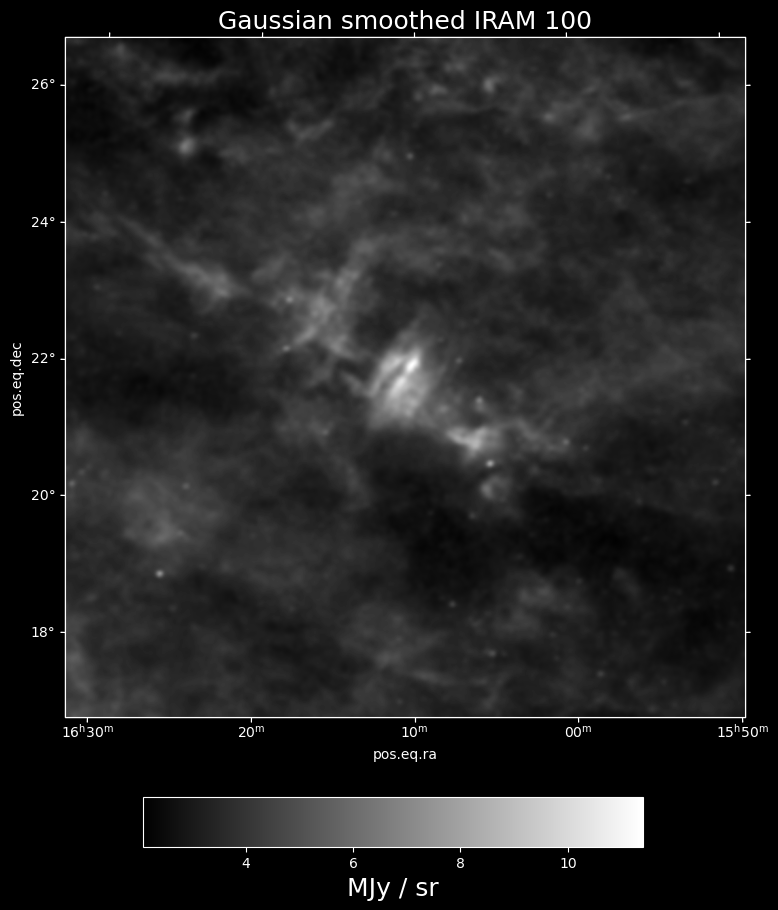

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


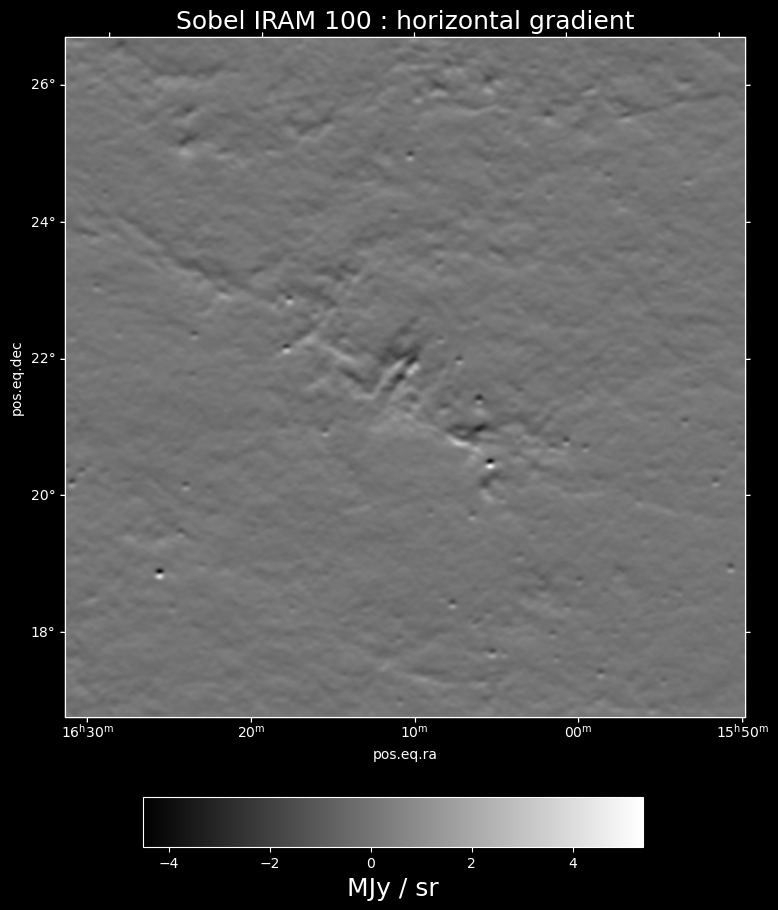

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


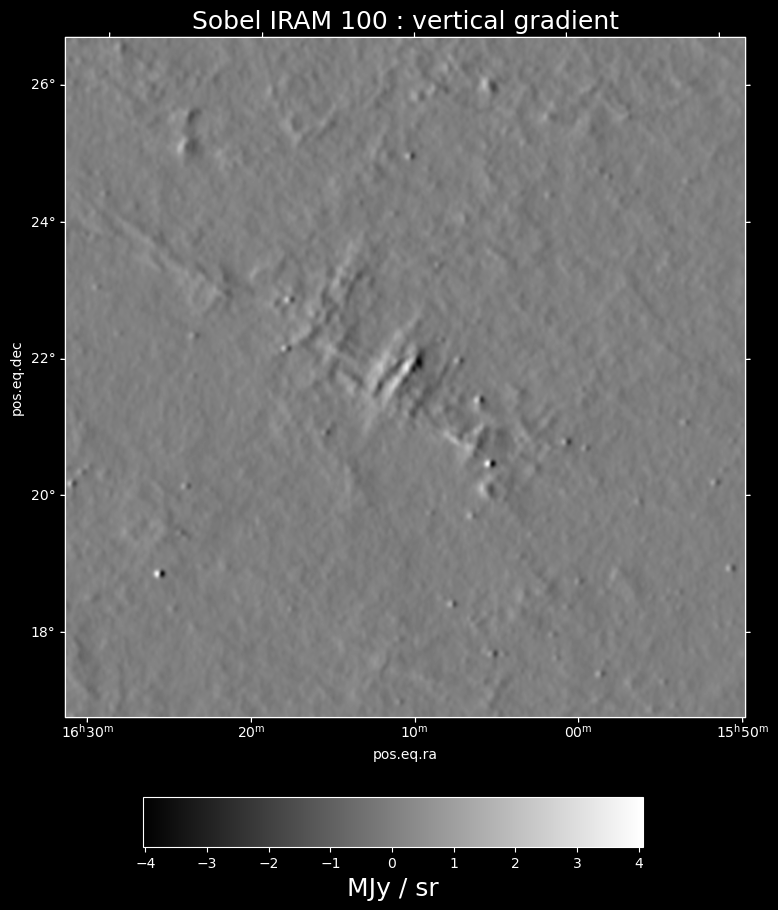

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


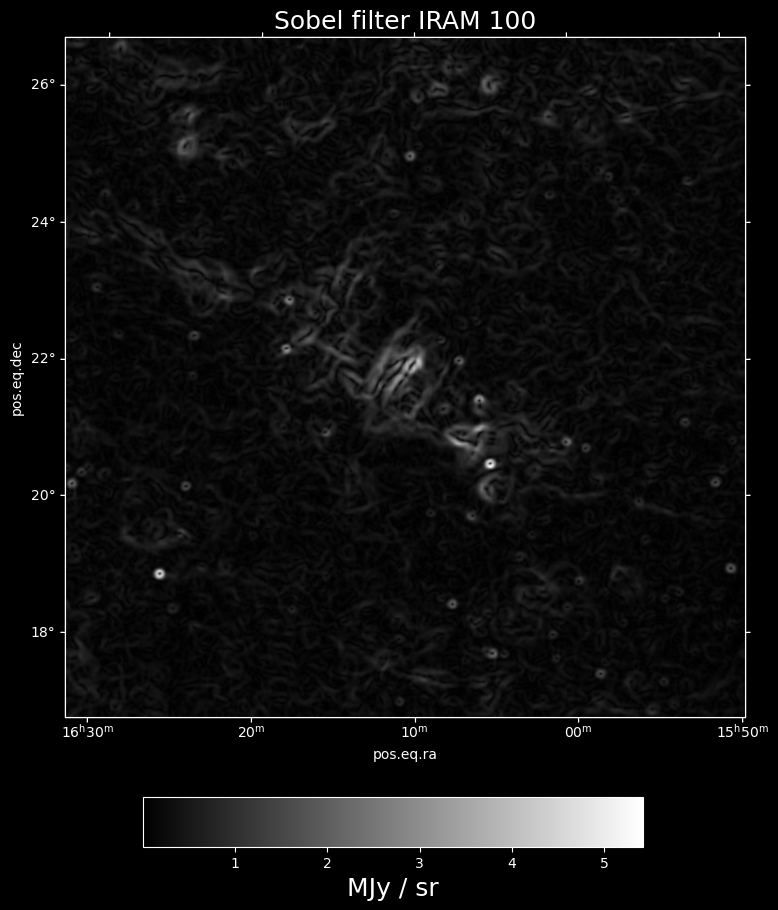

In [4]:
from scipy.ndimage import sobel, gaussian_filter

ir100_gfilt = gaussian_filter(IR100_DATA,sigma=2)
# ir100_gfilt *= IR100_DATA.max()/ir100_gfilt.max()

ir100_x = sobel(ir100_gfilt,axis=0)
ir100_y = sobel(ir100_gfilt,axis=1)

ir100_filt = np.sqrt(ir100_x**2 + ir100_y**2)
# ir100_filt *= IR100_DATA.max()/ir100_filt.max()


filpy.show_image(ir100_gfilt,projection=ir100_wcs,title='Gaussian smoothed IRAM 100',show=True,barlabel=INT_UNIT)
filpy.show_image(ir100_x,projection=ir100_wcs,title='Sobel IRAM 100 : horizontal gradient',show=True,barlabel=INT_UNIT)
filpy.show_image(ir100_y,projection=ir100_wcs,title='Sobel IRAM 100 : vertical gradient',show=True,barlabel=INT_UNIT)
filpy.show_image(ir100_filt,projection=ir100_wcs,title='Sobel filter IRAM 100',show=True,barlabel=INT_UNIT)


Subtract the Sobel filtered image from the smoothed one to magnify the structures

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')


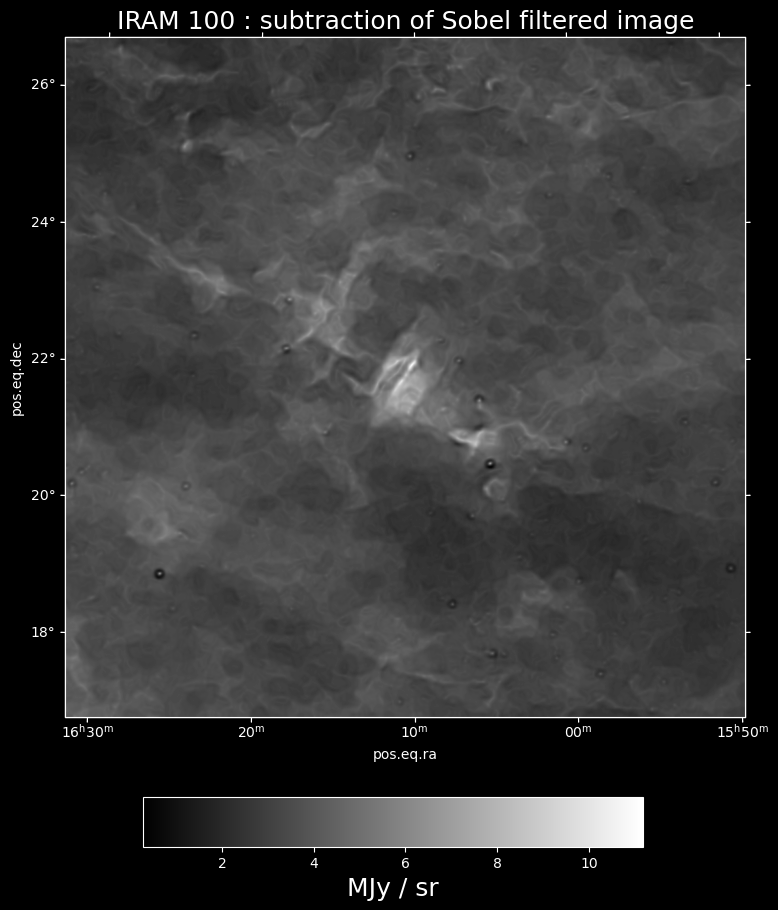

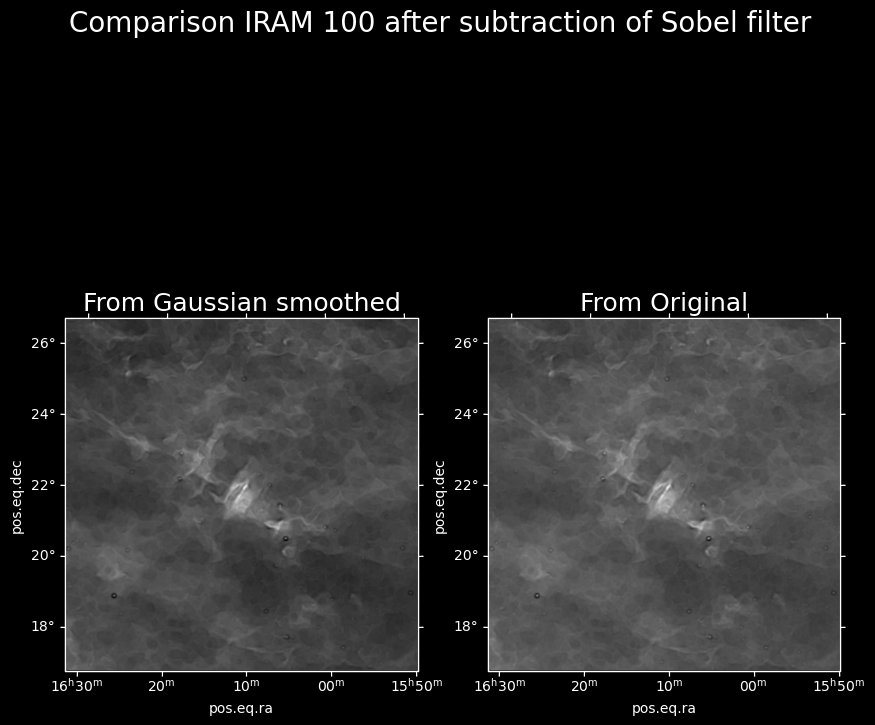

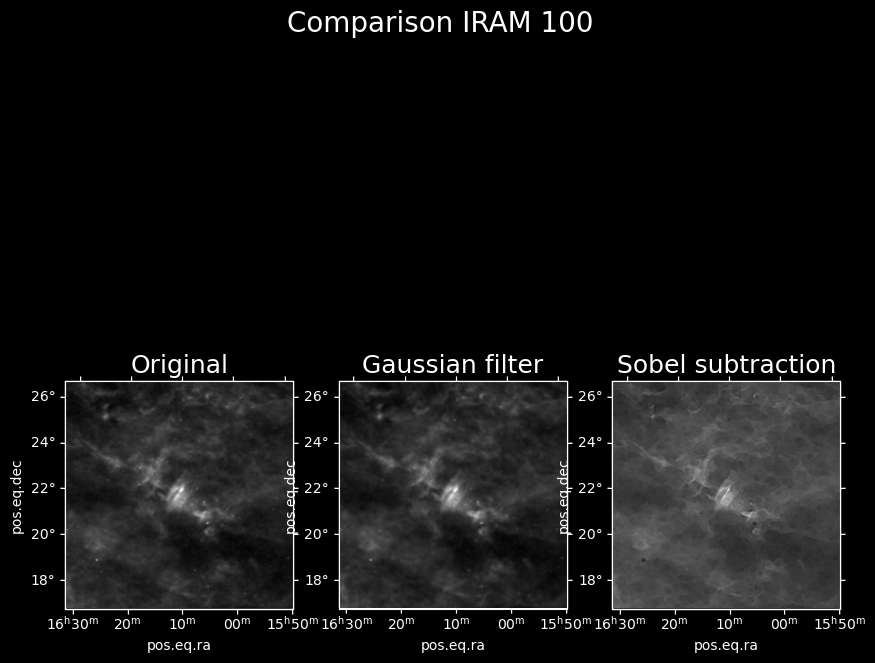

In [5]:
ir100 = ir100_gfilt-ir100_filt
filpy.show_image(ir100_gfilt-ir100_filt,projection=ir100_wcs,title='IRAM 100 : subtraction of Sobel filtered image',show=True,barlabel=INT_UNIT)
filpy.show_image([ir100,IR100_DATA-ir100_filt],num_plots=(1,2),projection=ir100_wcs,title='Comparison IRAM 100 after subtraction of Sobel filter',subtitles=('From Gaussian smoothed','From Original'),show=True,colorbar=False)
filpy.show_image([IR100_DATA,ir100_gfilt,ir100],num_plots=(1,3),projection=ir100_wcs,title='Comparison IRAM 100',subtitles=('Original','Gaussian filter','Sobel subtraction'),show=True,colorbar=False)


### Two Point Correlation Function (TPCF)

/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:117: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(image,cax=cbar_ax, cmap=figargs['cmap'], orientation='horizontal')
/home/bernardo/Scrivania/FISICA/ASTROFISICA/Thesis/filaments_strc_param/filpy/display.py:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([0.25, 0.07, 0.5, 0.05])


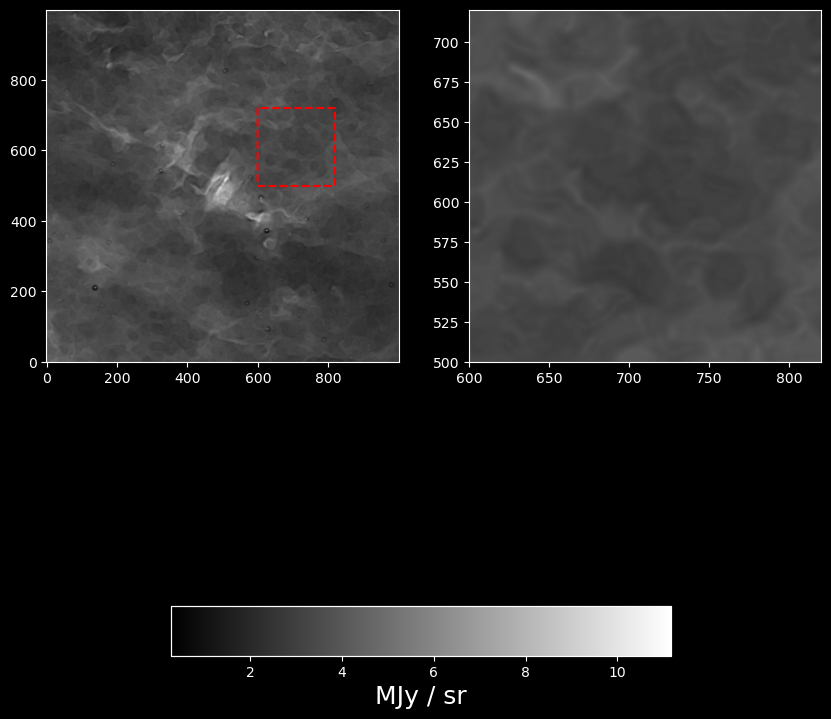

In [6]:
def rectangle(x_edges: tuple[int,int], y_edges: tuple[int,int]) -> tuple[list[int],list[int]]:
    return ([*x_edges]+[x_edges[1]]*2+[*x_edges[::-1]]+[x_edges[0]]*2, [y_edges[0]]*2+[*y_edges]+[y_edges[1]]*2+[*y_edges[::-1]])
xedges = (600,820)
yedges = (500,720)
# xedges = (600,650)
# yedges = (500,550)
fig,ax = filpy.show_image([ir100,ir100],num_plots=(1,2),barlabel=INT_UNIT)
ax[1].set_xlim(*xedges)
ax[1].set_ylim(*yedges)
ax[0].plot(*rectangle(xedges,yedges),'--',color='red')

plt.show()

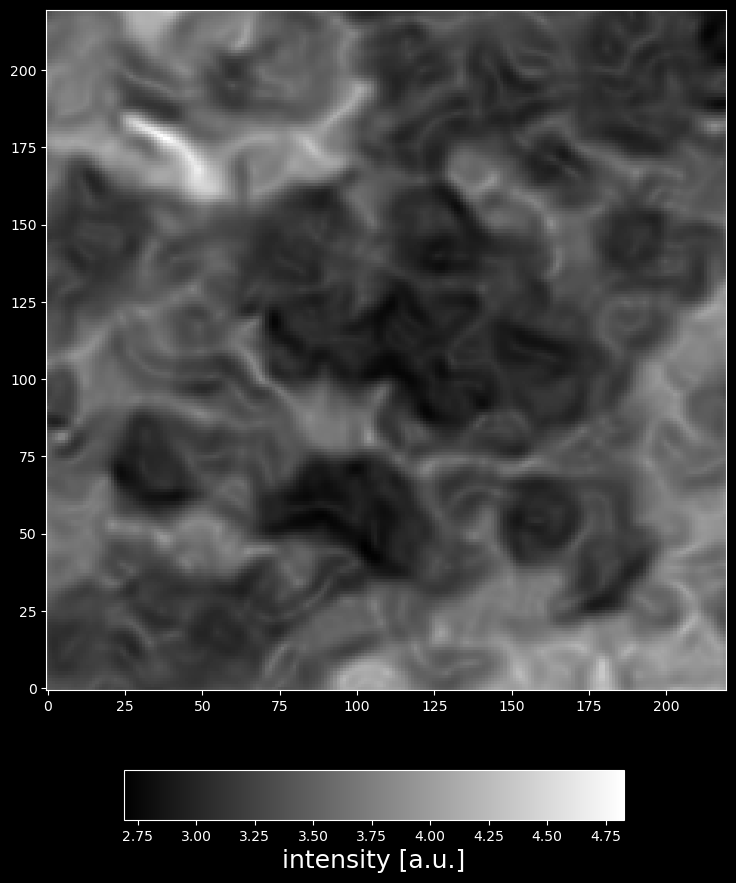

In [7]:

ir100_cut = np.copy(ir100[slice(*yedges),slice(*xedges)])
filpy.show_image(ir100_cut,show=True)